En este colab encontrarán algunas lineas que les pueden llegar a servir, haremos uso de los datos del práctico 3 para facilitar la comprensión.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler

In [ ]:
drive.mount('/content/drive') #acceden a sus documentos de drive

Mounted at /content/drive


In [ ]:
ruta =  '/content/drive/MyDrive/Curso/Practico 3/Datos/S1_Dataset.xls'
data = pd.read_excel(ruta)
data

,GROUP,Cluster,Control vs GOLD Clusters,Origin of Data (Clinical Trial),"Gender\n(1=Male,\n2=Female)",Age\n(years),Height\n(cm),Height\n(m),Weight\n(kg),BMI\n(kg/m2),...,Borg Score - \nLeg Max,"Limiting Symptom\n(1=Dyspnea,\n2=Leg Fatigue,\n3=General Fatigue,\n4=Other Reasons)",Steps/day,Mean Daily Time >3 mets\n(min),Mean Daily Energy Expenditure >3 mets\n(kcal),Hypertension\n(1=Yes),Dyslipidemia\n(1=Yes),Coronary Heart Disease\n(1=Yes),Diabetes \n(1=Yes),Neoplasia\n(1=Yes)
0,COPD GOLD stage I,1,1,NCT01072396,2,70,176.0,1.760,77.3,24.700000,...,4.0,2,8636.938,75.01230,566.93025,1.0,NaN,NaN,NaN,NaN
1,COPD GOLD stage I,1,1,NCT01072396,2,56,159.0,1.590,49.5,19.800000,...,9.0,1,2841.976,84.00000,427.74925,NaN,1.0,NaN,NaN,NaN
2,COPD GOLD stage I,1,1,NCT01072396,1,52,182.8,1.828,107.9,32.200000,...,5.0,3,9898.029,89.62476,907.03400,NaN,NaN,NaN,NaN,NaN
3,COPD GOLD stage I,1,1,NCT01072396,2,65,166.0,1.660,70.8,25.800000,...,3.0,2,8448.015,75.00492,560.85925,1.0,NaN,NaN,NaN,NaN
4,COPD GOLD stage I,1,1,NCT01072396,2,64,164.0,1.640,60.9,22.200000,...,6.0,3,8319.044,92.97276,560.04925,NaN,1.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,Control,2,Control,NCT01360788,1,66,173.0,1.730,78.1,26.095092,...,3.5,1,8470.000,102.00000,504.00000,NaN,NaN,NaN,NaN,NaN
199,Control,2,Control,NCT01360788,1,67,179.0,1.790,97.0,30.273712,...,6.5,3,7613.000,108.00000,682.00000,NaN,NaN,NaN,NaN,NaN
200,Control,2,Control,NCT01360788,1,67,168.0,1.680,82.0,29.053288,...,5.0,1,10749.000,250.00000,1337.00000,NaN,NaN,NaN,NaN,NaN
201,Control,3,Control,NCT01360788,1,56,164.0,1.640,106.0,39.411065,...,3.0,1,7682.000,62.00000,414.00000,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.fillna(0, inplace = True)
data.drop('LLN Status', axis=1, inplace=True)
clases_df = data['GROUP']
X_ = data.iloc[:, 5:-5].copy()
scaler = MinMaxScaler()
X_df = pd.DataFrame(scaler.fit_transform(X_), columns=X_.columns)

#eliminé esas características al ser categóricas
X_df.drop(['Cough\n(0=No,\n1=Yes)', 'Smoking Status\n(0=Never Smoker,\n1=Ex-Smoker,\n2=Active Smoker)'], axis = 1, inplace = True)

Selección de variables por PCA

In [ ]:
pca = PCA()
X_pca_sklearn = pca.fit_transform(X_df)
varianza_sklearn = pca.explained_variance_ratio_

In [ ]:
valores_componentes = pca.components_
df_valores_componentes = pd.DataFrame(valores_componentes, columns=X_df.columns)

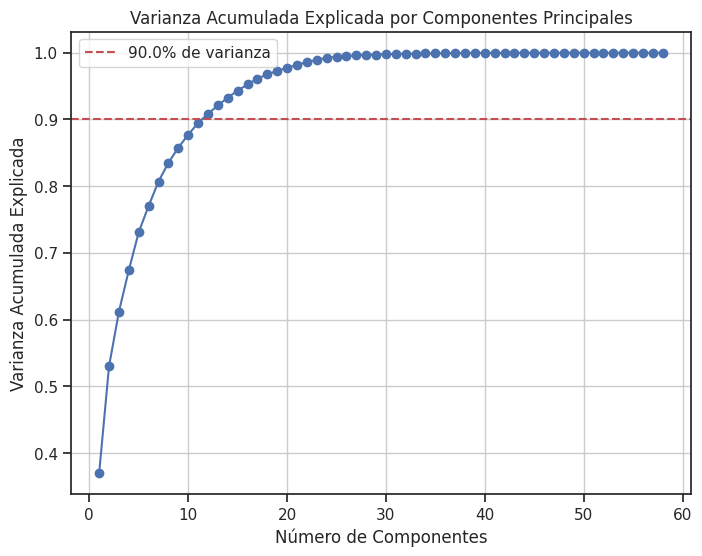

In [ ]:
porcentaje_deseado = 0.90
varianza_acumulada = np.array(varianza_sklearn).cumsum() #cumsum() es un método de numpy que calcula la suma acumulativa en un vector

# Graficamos
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o', linestyle='-', color='b')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada Explicada')
plt.title('Varianza Acumulada Explicada por Componentes Principales')
plt.grid(True)

# Linea de corte respecto al porcentaje deseado
plt.axhline(y=porcentaje_deseado, color='r', linestyle='--', label=f'{porcentaje_deseado*100}% de varianza')

plt.legend()
plt.show()

La librería Seaborn permite visualizar las proyecciones de todas las combinaciones de pares de columnas de un df, así pueden realizar sus reducciones de dimensionalidad favoritas y luego graficar en diferentes combinaciones de ejes.

In [ ]:
import seaborn as sns
N_pca = 12 #Dado la cantidad de componentes que explican el 90% de la varianza
pca = PCA(n_components=N_pca)
X_pca = pca.fit_transform(X_df)

# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i}' for i in range(1, N_pca + 1)])
pca_df['Target'] = clases_df

# Visualizar las proyecciones de todas las combinaciones de pares de columnas
sns.pairplot(pca_df, hue='Target', palette='viridis')
plt.suptitle('Proyecciones de PCA: Pares de Columnas', y=1.02)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Pueden apreciar como el valor que toman nuestras muestras al ser proyectadas sobre el componente 2 añade información que permite separar los grupos de forma deseada (entre enfermo y control), por lo cual podrían quedarse con las N_c columnas que expliquen dicho componente

In [ ]:
def ordena_df(df, n_top=100):
    # Aplicar la función a cada fila del DataFrame
    def columnas_importantes(fila):
        columnas_ordenadas = sorted(fila.items(), key=lambda x: abs(x[1]), reverse=True)
        nombres_columnas = [nombre for nombre, _ in columnas_ordenadas[:n_top]]
        return nombres_columnas

    # Crear un nuevo DataFrame con las columnas ordenadas por valor absoluto
    df_ordenado = df.apply(columnas_importantes, axis=1)

    return df_ordenado

In [ ]:
#Tomando las N_n columnas más representativas del PCA
N_c = 6
df_pca_ordenado = ordena_df(df_valores_componentes, N_c)
columnas = df_pca_ordenado[1]

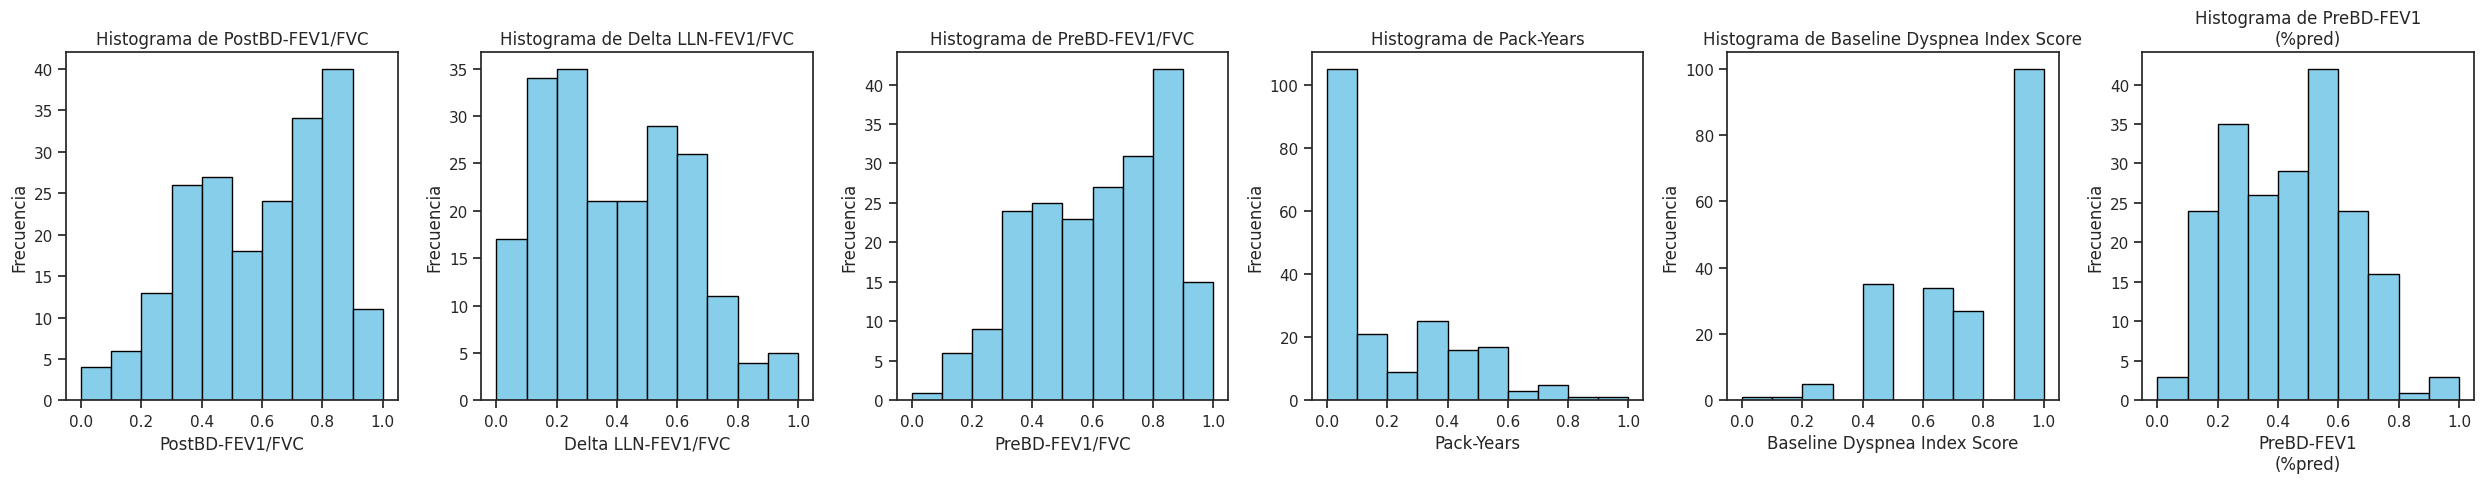

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=len(columnas), figsize=(25, 5))

# Iterar sobre las columnas y crear histogramas
for i, columna in enumerate(columnas):
    axes[i].hist(X_df[columna], bins=10, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histograma de {columna}')
    axes[i].set_xlabel(columna)
    axes[i].set_ylabel('Frecuencia')

# Ajustar el diseño
plt.tight_layout()
plt.show()

En caso de no ser tan directo, podrían intentar con reducción de dimensionalidad, en este caso tomamos nuevas características que definan nuestras instancias.

In [ ]:
#Reducción de dimensionalidad
M = 50 #Cantidad columnas deseada
x = np.array(X_df)
proyeccion = x.dot(pca.components_.T)
variables = proyeccion[:, :M]